# WhatsApp Chat and Sentiments Analysis

## Importing Necessary Libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
f = open('WhatsApp Chat with BS Maths 2k19.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

8/9/21, 21:36 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/10/21, 00:45 - Farwa SNS: Happy Birthday Nida 🎂🎂💕💕
8/10/21, 03:39 - Pairrow e Zahra SNS: Happiest birthday NIDA❤️
8/10/21, 05:24 - Tamseela SNS: Happiest bday g
May u have many many more
Stay blessed 🎉🥳❤️❤️❤️
8/10/21, 05:38 - Muqaddas SNS: Happy birthday Nida ❤️
8/10/21, 08:16 - Mahnoor SNS: Happy birthday Nida
8/10/21, 08:24 - Warda SNS: Happy Birthday Nida 💕
8/10/21, 08:40 - Zeeshan Aafandi: Happy birthday Nida😋
8/10/21, 08:46 - Shahim SNS: Happy birthdayy nidaa
8/10/21, 09:31 - Khadija SNS: Happy Birthday, Nida ♥️
8/10/21, 09:42 - Sahiqa SNS: Happy Birthday Nida 💕
8/10/21, 11:03 - Roshni SNS: Happy birthday NIDA❤️❤️
8/10/21, 11:22 - Nida SNS: Thank you soo much everyone ☺️❣️
8/10/21, 15:27 - Rida SNS: Happy birthday Nida!
8/10/21, 15:28 - Ameema SNS: Happy Birthday Nida! 🌸🥳
8/10/21, 17:57 - Zakariya: Happy Birthday Nida
8/10/21

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

## Data Pre-processing

In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Farwa SNS: Happy Birthday Nida 🎂🎂💕💕\n',
 'Pairrow e Zahra SNS: Happiest birthday NIDA❤️\n',
 'Tamseela SNS: Happiest bday g\nMay u have many many more\nStay blessed 🎉🥳❤️❤️❤️\n',
 'Muqaddas SNS: Happy birthday Nida ❤️\n',
 'Mahnoor SNS: Happy birthday Nida\n',
 'Warda SNS: Happy Birthday Nida 💕\n',
 'Zeeshan Aafandi: Happy birthday Nida😋\n',
 'Shahim SNS: Happy birthdayy nidaa\n',
 'Khadija SNS: Happy Birthday, Nida ♥️\n',
 'Sahiqa SNS: Happy Birthday Nida 💕\n',
 'Roshni SNS: Happy birthday NIDA❤️❤️\n',
 'Nida SNS: Thank you soo much everyone ☺️❣️\n',
 'Rida SNS: Happy birthday Nida!\n',
 'Ameema SNS: Happy Birthday Nida! 🌸🥳\n',
 'Zakariya: Happy Birthday Nida\n',
 'Mariam SNS: Happy Birthdayyy Nida 🎉✨🌸🥳\n',
 'Nida SNS: Thankeww.... ♥️🌸\n',
 'Your security code with Mahnoor SNS changed. Tap to learn more.\n',
 'Your security code with Mahnoo

In [7]:
dates = re.findall(pattern, data)
dates

['8/9/21, 21:36 - ',
 '8/10/21, 00:45 - ',
 '8/10/21, 03:39 - ',
 '8/10/21, 05:24 - ',
 '8/10/21, 05:38 - ',
 '8/10/21, 08:16 - ',
 '8/10/21, 08:24 - ',
 '8/10/21, 08:40 - ',
 '8/10/21, 08:46 - ',
 '8/10/21, 09:31 - ',
 '8/10/21, 09:42 - ',
 '8/10/21, 11:03 - ',
 '8/10/21, 11:22 - ',
 '8/10/21, 15:27 - ',
 '8/10/21, 15:28 - ',
 '8/10/21, 17:57 - ',
 '8/10/21, 17:58 - ',
 '8/10/21, 19:08 - ',
 '8/11/21, 11:03 - ',
 '8/11/21, 11:12 - ',
 '8/14/21, 01:26 - ',
 '8/16/21, 23:40 - ',
 '8/26/21, 05:16 - ',
 '8/26/21, 13:29 - ',
 '8/26/21, 13:51 - ',
 '8/27/21, 14:08 - ',
 '8/27/21, 14:14 - ',
 '8/29/21, 14:44 - ',
 '8/29/21, 16:12 - ',
 '9/3/21, 02:06 - ',
 '9/3/21, 11:16 - ',
 '9/10/21, 13:28 - ',
 '9/10/21, 13:30 - ',
 '9/10/21, 13:31 - ',
 '9/10/21, 13:31 - ',
 '9/10/21, 13:31 - ',
 '9/10/21, 13:35 - ',
 '9/10/21, 13:37 - ',
 '9/10/21, 13:38 - ',
 '9/10/21, 13:44 - ',
 '9/10/21, 13:58 - ',
 '9/10/21, 14:06 - ',
 '9/11/21, 18:07 - ',
 '9/12/21, 19:28 - ',
 '9/12/21, 19:28 - ',
 '9/12/21, 19

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

In [9]:
df

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-08-09 21:36:00
1,Farwa SNS: Happy Birthday Nida 🎂🎂💕💕\n,2021-08-10 00:45:00
2,Pairrow e Zahra SNS: Happiest birthday NIDA❤️\n,2021-08-10 03:39:00
3,Tamseela SNS: Happiest bday g\nMay u have many...,2021-08-10 05:24:00
4,Muqaddas SNS: Happy birthday Nida ❤️\n,2021-08-10 05:38:00
...,...,...
3724,Your security code with Mickie Muqaddas change...,2023-09-28 04:50:00
3725,Ameema SNS: Guys.. Kisi k pas fundamental of c...,2023-09-28 15:51:00
3726,Faisal SNS NUST: Hamza\n,2023-09-28 17:38:00
3727,Ameema SNS: Mil gya tha bas lms se..\n,2023-09-28 17:59:00


In [10]:
users = []
messages = []
for message in df['user_message']:
    if 'created group "NUSTIAN USA: Engagement, Analytics, and Insights"' in message or 'You changed the group name from' in message:
        users.append('group_notification')
        messages.append(message)
        continue
    else:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [11]:
df

,date,user,message
0,2021-08-09 21:36:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-08-10 00:45:00,Farwa SNS,Happy Birthday Nida 🎂🎂💕💕\n
2,2021-08-10 03:39:00,Pairrow e Zahra SNS,Happiest birthday NIDA❤️\n
3,2021-08-10 05:24:00,Tamseela SNS,Happiest bday g\nMay u have many many more\nSt...
4,2021-08-10 05:38:00,Muqaddas SNS,Happy birthday Nida ❤️\n
...,...,...,...
3724,2023-09-28 04:50:00,group_notification,Your security code with Mickie Muqaddas change...
3725,2023-09-28 15:51:00,Ameema SNS,Guys.. Kisi k pas fundamental of computer prog...
3726,2023-09-28 17:38:00,Faisal SNS NUST,Hamza\n
3727,2023-09-28 17:59:00,Ameema SNS,Mil gya tha bas lms se..\n


In [12]:
df.loc[:, 'message'] = df['message'].str.replace('\n', '')
df

,date,user,message
0,2021-08-09 21:36:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-08-10 00:45:00,Farwa SNS,Happy Birthday Nida 🎂🎂💕💕
2,2021-08-10 03:39:00,Pairrow e Zahra SNS,Happiest birthday NIDA❤️
3,2021-08-10 05:24:00,Tamseela SNS,Happiest bday gMay u have many many moreStay b...
4,2021-08-10 05:38:00,Muqaddas SNS,Happy birthday Nida ❤️
...,...,...,...
3724,2023-09-28 04:50:00,group_notification,Your security code with Mickie Muqaddas change...
3725,2023-09-28 15:51:00,Ameema SNS,Guys.. Kisi k pas fundamental of computer prog...
3726,2023-09-28 17:38:00,Faisal SNS NUST,Hamza
3727,2023-09-28 17:59:00,Ameema SNS,Mil gya tha bas lms se..


In [13]:
Total_Members = len(df['user'].unique()) - 1
Total_Members

39

In [14]:
df = df[df['user'] != 'group_notification']

In [15]:
mess_per_user = df['user'].value_counts()

In [16]:
mess_per_user = dict(mess_per_user)

## Creating Histogram of Top 10 Particioants by Message Count

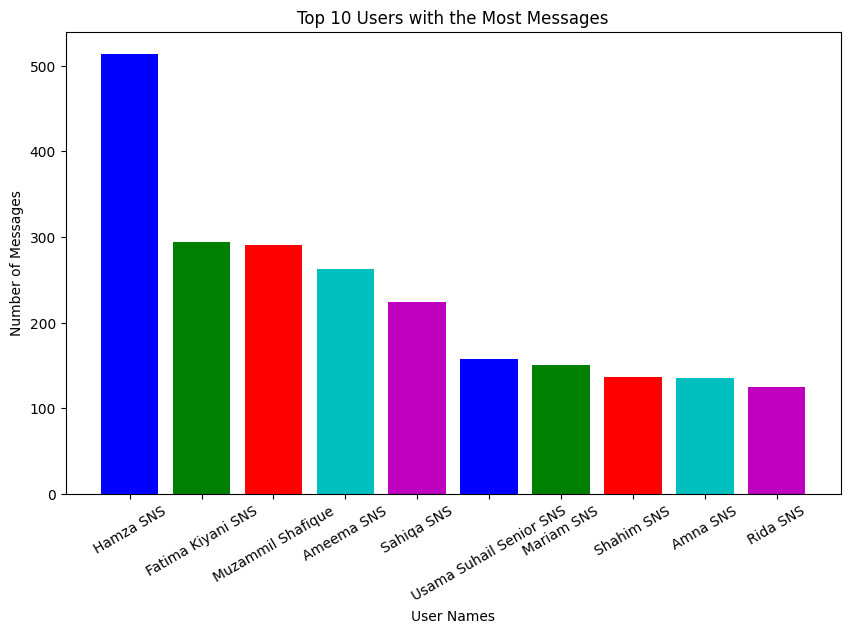

In [17]:
# Sample data (replace with your actual data)
user_names = list(mess_per_user.keys())
message_counts = list(mess_per_user.values())
num_of_users_in_hist = 10
# Sort the data by message counts and get the top 10 users
sorted_data = sorted(zip(user_names, message_counts), key=lambda x: x[1], reverse=True)[:num_of_users_in_hist]
user_names, message_counts = zip(*sorted_data)

# Define a list of distinct colors to cycle through
colors = ['b', 'g', 'r', 'c', 'm']

# Create the histogram with multicolored bars
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
bars = plt.bar(user_names, message_counts, color=colors)

plt.xlabel('User Names')
plt.ylabel('Number of Messages')
plt.title(f'Top {num_of_users_in_hist} Users with the Most Messages')
plt.xticks(rotation=30)  # Rotate x-axis labels for vertical orientation

plt.show()

In [18]:
mess_per_user

{'Hamza SNS': 514,
 'Fatima Kiyani SNS': 294,
 'Muzammil Shafique': 291,
 'Ameema SNS': 262,
 'Sahiqa SNS': 224,
 'Usama Suhail Senior SNS': 157,
 'Mariam SNS': 150,
 'Shahim SNS': 136,
 'Amna SNS': 135,
 'Rida SNS': 125,
 'Yusra SNS': 112,
 'Uzma SNS Sns': 103,
 'Warda SNS': 101,
 'Khadija SNS': 90,
 'Zakariya': 87,
 'Nida SNS': 86,
 'Hania SNS': 85,
 'Farwa SNS': 71,
 'Tamseela SNS': 69,
 'Sawera SNS': 63,
 'Zeeshan Aafandi': 58,
 'Faisal SNS NUST': 54,
 'Pairrow e Zahra SNS': 53,
 'Mickie Muqaddas': 53,
 'Mahnoor SNS': 39,
 'Durr e Najaf SNS': 39,
 'Waseem Naveed SNS': 36,
 'Lari SNS': 30,
 'Roshni SNS': 23,
 'Luqman SNS': 19,
 'Anaiza SNS': 18,
 'Masooma SNS': 15,
 'Muqaddas SNS': 15,
 'Faisal SNS': 14,
 'Kainat SNS': 14,
 'Dawood Asghar': 9,
 'Hasnain SNS': 8,
 'Mughees Senior SNS': 3,
 'Hijab SNS': 1}

In [19]:
mess_per_user_percentage = dict((df['user'].value_counts()/df.shape[0]) * 100)
mess_per_user_percentage

{'Hamza SNS': 14.059080962800873,
 'Fatima Kiyani SNS': 8.041575492341355,
 'Muzammil Shafique': 7.959518599562363,
 'Ameema SNS': 7.166301969365427,
 'Sahiqa SNS': 6.12691466083151,
 'Usama Suhail Senior SNS': 4.294310722100656,
 'Mariam SNS': 4.102844638949672,
 'Shahim SNS': 3.7199124726477026,
 'Amna SNS': 3.6925601750547044,
 'Rida SNS': 3.4190371991247264,
 'Yusra SNS': 3.063457330415755,
 'Uzma SNS Sns': 2.8172866520787747,
 'Warda SNS': 2.762582056892779,
 'Khadija SNS': 2.461706783369803,
 'Zakariya': 2.3796498905908097,
 'Nida SNS': 2.352297592997812,
 'Hania SNS': 2.324945295404814,
 'Farwa SNS': 1.9420131291028448,
 'Tamseela SNS': 1.887308533916849,
 'Sawera SNS': 1.723194748358862,
 'Zeeshan Aafandi': 1.5864332603938731,
 'Faisal SNS NUST': 1.477024070021882,
 'Pairrow e Zahra SNS': 1.449671772428884,
 'Mickie Muqaddas': 1.449671772428884,
 'Mahnoor SNS': 1.0667396061269148,
 'Durr e Najaf SNS': 1.0667396061269148,
 'Waseem Naveed SNS': 0.9846827133479212,
 'Lari SNS': 0.

## Creating Pie Chart of Top 5 Particioants by Messages Percentage

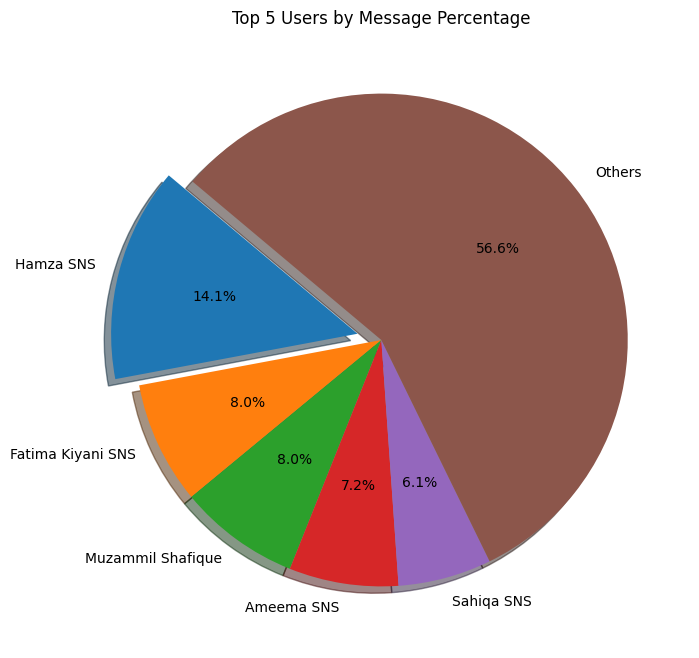

In [20]:
# Sort the data by percentage in descending order
sorted_data = sorted(mess_per_user_percentage.items(), key=lambda x: x[1], reverse=True)
num_of_users_in_pie_chart = 5
# Take the top 5 highest percentages and group the rest as "Others"
top_5_data = sorted_data[:num_of_users_in_pie_chart]
remaining_percentage = sum(item[1] for item in sorted_data[5:])
top_5_data.append(('Others', remaining_percentage))

# Separate labels and percentages for the pie chart
labels, percentages = zip(*top_5_data)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
explode = (0.1,0,0,0,0,0)  # Explode the 1st slice (Hamza SNS)

plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title(f'Top {num_of_users_in_pie_chart} Users by Message Percentage')

plt.show()

## Sentiment Analysis

In [21]:
df

,date,user,message
1,2021-08-10 00:45:00,Farwa SNS,Happy Birthday Nida 🎂🎂💕💕
2,2021-08-10 03:39:00,Pairrow e Zahra SNS,Happiest birthday NIDA❤️
3,2021-08-10 05:24:00,Tamseela SNS,Happiest bday gMay u have many many moreStay b...
4,2021-08-10 05:38:00,Muqaddas SNS,Happy birthday Nida ❤️
5,2021-08-10 08:16:00,Mahnoor SNS,Happy birthday Nida
...,...,...,...
3714,2023-07-14 16:34:00,Zakariya,<Media omitted>
3715,2023-07-14 16:34:00,Zakariya,Agr ap sa kisi ko link mily to share kr dy.
3725,2023-09-28 15:51:00,Ameema SNS,Guys.. Kisi k pas fundamental of computer prog...
3726,2023-09-28 17:38:00,Faisal SNS NUST,Hamza


In [22]:
new_df = df[df['message'] != '<Media omitted>']
new_df = new_df.dropna()
new_df

,date,user,message
1,2021-08-10 00:45:00,Farwa SNS,Happy Birthday Nida 🎂🎂💕💕
2,2021-08-10 03:39:00,Pairrow e Zahra SNS,Happiest birthday NIDA❤️
3,2021-08-10 05:24:00,Tamseela SNS,Happiest bday gMay u have many many moreStay b...
4,2021-08-10 05:38:00,Muqaddas SNS,Happy birthday Nida ❤️
5,2021-08-10 08:16:00,Mahnoor SNS,Happy birthday Nida
...,...,...,...
3712,2023-06-29 16:44:00,Sahiqa SNS,Khair Mubarak ♡
3715,2023-07-14 16:34:00,Zakariya,Agr ap sa kisi ko link mily to share kr dy.
3725,2023-09-28 15:51:00,Ameema SNS,Guys.. Kisi k pas fundamental of computer prog...
3726,2023-09-28 17:38:00,Faisal SNS NUST,Hamza


In [23]:
sentiments = SentimentIntensityAnalyzer()
new_df['positive'] = [sentiments.polarity_scores(i)['pos'] for i in new_df['message']]
new_df['negative'] = [sentiments.polarity_scores(i)['neg'] for i in new_df['message']]
new_df['neutral'] = [sentiments.polarity_scores(i)['neu'] for i in new_df['message']]

new_df

,date,user,message,positive,negative,neutral
1,2021-08-10 00:45:00,Farwa SNS,Happy Birthday Nida 🎂🎂💕💕,0.552,0.0,0.448
2,2021-08-10 03:39:00,Pairrow e Zahra SNS,Happiest birthday NIDA❤️,0.677,0.0,0.323
3,2021-08-10 05:24:00,Tamseela SNS,Happiest bday gMay u have many many moreStay b...,0.536,0.0,0.464
4,2021-08-10 05:38:00,Muqaddas SNS,Happy birthday Nida ❤️,0.552,0.0,0.448
5,2021-08-10 08:16:00,Mahnoor SNS,Happy birthday Nida,0.649,0.0,0.351
...,...,...,...,...,...,...
3712,2023-06-29 16:44:00,Sahiqa SNS,Khair Mubarak ♡,0.000,0.0,1.000
3715,2023-07-14 16:34:00,Zakariya,Agr ap sa kisi ko link mily to share kr dy.,0.180,0.0,0.820
3725,2023-09-28 15:51:00,Ameema SNS,Guys.. Kisi k pas fundamental of computer prog...,0.000,0.0,1.000
3726,2023-09-28 17:38:00,Faisal SNS NUST,Hamza,0.000,0.0,1.000


In [24]:
new_df[new_df['user'] == 'Shahim SNS']

,date,user,message,positive,negative,neutral
8,2021-08-10 08:46:00,Shahim SNS,Happy birthdayy nidaa,0.649,0.000,0.351
40,2021-09-10 13:58:00,Shahim SNS,All of our uni years wasted like this...,0.214,0.274,0.513
71,2021-09-12 21:54:00,Shahim SNS,thank u!,0.736,0.000,0.264
78,2021-09-13 14:00:00,Shahim SNS,could someone please add me to the team,0.247,0.000,0.753
79,2021-09-13 14:00:00,Shahim SNS,real analysis ki,0.000,0.000,1.000
...,...,...,...,...,...,...
3557,2023-05-23 18:04:00,Shahim SNS,?*,0.000,0.000,1.000
3559,2023-05-23 18:06:00,Shahim SNS,"Yes got that, but what about our exam?",0.209,0.000,0.791
3579,2023-05-24 14:14:00,Shahim SNS,Mining ki class mai kaun kaun hai?,0.000,0.000,1.000
3602,2023-05-26 20:51:00,Shahim SNS,16th slide included hai final mai?,0.000,0.000,1.000


In [25]:
unique_users_df = new_df.drop_duplicates(subset=['user'])
unique_users_df = unique_users_df['user']
unique_users_df = pd.DataFrame(unique_users_df)
unique_users_df['positive'] = None
unique_users_df['negative'] = None
unique_users_df['neutral'] = None
unique_users_df

,user,positive,negative,neutral
1,Farwa SNS,None,None,None
2,Pairrow e Zahra SNS,None,None,None
3,Tamseela SNS,None,None,None
4,Muqaddas SNS,None,None,None
5,Mahnoor SNS,None,None,None
6,Warda SNS,None,None,None
7,Zeeshan Aafandi,None,None,None
8,Shahim SNS,None,None,None
9,Khadija SNS,None,None,None
10,Sahiqa SNS,None,None,None


In [26]:
for i in unique_users_df['user'].values:
    each_df = new_df[new_df['user'] == i]
    pos = sum(each_df['positive'])
    neg = sum(each_df['negative'])
    neu = sum(each_df['neutral'])
    unique_users_df.loc[unique_users_df['user'] == i, 'positive'] = pos
    unique_users_df.loc[unique_users_df['user'] == i, 'negative'] = neg
    unique_users_df.loc[unique_users_df['user'] == i, 'neutral'] = neu

In [32]:
unique_users_df

,user,positive,negative,neutral
1,Farwa SNS,14.388,0.194,39.418
2,Pairrow e Zahra SNS,3.491,0.862,26.647
3,Tamseela SNS,15.895,1.721,39.383
4,Muqaddas SNS,5.563,0.0,9.437
5,Mahnoor SNS,12.406,1.178,23.416
6,Warda SNS,18.929,0.436,66.634
7,Zeeshan Aafandi,8.49,0.037,36.474
8,Shahim SNS,18.354,2.329,89.318
9,Khadija SNS,24.867,1.32,58.812
10,Sahiqa SNS,38.142,3.475,162.381


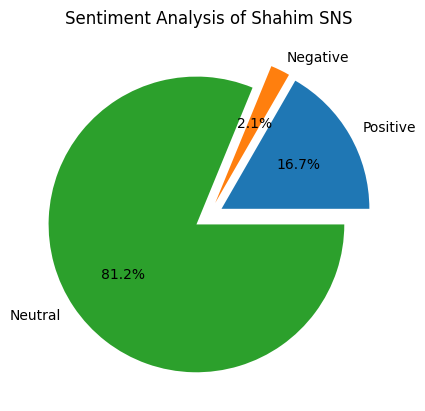

<Figure size 1000x1000 with 0 Axes>

In [35]:
user = 'Shahim SNS'
pos = unique_users_df.loc[unique_users_df['user'] == user, 'positive'].values[0]
neg = unique_users_df.loc[unique_users_df['user'] == user, 'negative'].values[0]
neu = unique_users_df.loc[unique_users_df['user'] == user, 'neutral'].values[0]

sentiment_values = [pos, neg, neu]
labels = ['Positive', 'Negative', 'Neutral']
explode = (0.1, 0.1, 0.1)
title = f"Sentiment Analysis of {user}"
plt.pie(sentiment_values, labels=labels, explode=explode,autopct='%1.1f%%')
plt.title(title)
plt.figure(figsize=(10, 10))
plt.show()